In [1]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
from matplotlib import style
from pandas import read_csv
from pandas.util.testing import assert_frame_equal
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%config IPCompleter.greedy=True

Using TensorFlow backend.


In [2]:
cd desktop/AirlinesData

/Users/akashghosh/Desktop/AirlinesData


In [3]:
#using the csv data 
Airchina_df = pd.read_csv('Airchina.csv')
Lufthansa_df = pd.read_csv('Lufthansa.csv')
American_df = pd.read_csv('American.csv')
Delta_df = pd.read_csv('Delta.csv')
Qantas_df = pd.read_csv('Qantas.csv')

In [4]:
#using delta airlines data for the prediction
Delta_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,56.750000,58.430000,56.419998,57.580002,57.185318,30775300
1,2019-11-11,57.259998,57.689999,56.070000,56.849998,56.460320,20460900
2,2019-11-18,56.779999,57.490002,55.119999,56.110001,55.725391,30546100
3,2019-11-25,56.389999,57.849998,55.689999,57.310001,56.917168,18426600
4,2019-12-02,57.250000,57.650002,54.540001,56.139999,55.755184,25728100
5,2019-12-09,55.990002,57.490002,54.950001,56.730000,56.341141,27781600
6,2019-12-16,57.169998,59.639999,57.150002,58.970001,58.565788,29632200
7,2019-12-23,59.169998,59.919998,58.790001,59.080002,58.675037,10727100
8,2019-12-30,59.250000,59.389999,56.910000,58.060001,57.662025,20233900
9,2020-01-06,56.990002,59.490002,56.660000,59.240002,58.833939,33202700


In [5]:
#Using LSTM for Delta

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('Delta.csv', usecols=[5], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 3
trainX, trainY = create_dataset(dataset, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
# create and fit the LSTM network
#trainX

In [6]:
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 52ms/step - loss: 0.6823
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5807
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4842
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3950
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3127
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2388
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1774
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1247
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0860
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0602
Epoch 11/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0418
Epoch 12/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 13/100
15/15 [================

In [7]:
# make predictions
trainPredict = model.predict(trainX[-1].reshape(1,1,3))
#testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)

[[53.32353]]


In [8]:
#Using LSTM for Qantas

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('Qantas.csv', usecols=[5], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 3
trainX, trainY = create_dataset(dataset, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
# create and fit the LSTM network
#trainX

In [9]:
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 44ms/step - loss: 0.4580
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3894
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3245
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2607
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2054
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1545
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1153
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0564
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0423
Epoch 11/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0309
Epoch 12/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0243
Epoch 13/100
15/15 [================

In [10]:
#Using LSTM for Lufthansa

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('Lufthansa.csv', usecols=[5], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 3
trainX, trainY = create_dataset(dataset, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
# create and fit the LSTM network
#trainX

In [11]:
# make predictions
trainPredict = model.predict(trainX[-1].reshape(1,1,3))
#testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)

[[14.776471]]


In [12]:
#Using LSTM for Qantas

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('Qantas.csv', usecols=[5], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 3
trainX, trainY = create_dataset(dataset, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
# create and fit the LSTM network
#trainX

In [13]:
# make predictions
trainPredict = model.predict(trainX[-1].reshape(1,1,3))
#testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)

[[18.994837]]


In [14]:
#By using DataReader we will get the stock quote from Yahoo Finance
Delta_df = web.DataReader('DAL', data_source = 'yahoo', start = '2019-09-09', end = '2020-03-09')
#Show the data
Delta_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-09,58.450001,57.560001,57.980000,58.110001,5740500.0,57.286106
2019-09-10,58.720001,57.799999,58.080002,58.639999,4409600.0,57.808586
2019-09-11,59.180000,58.139999,58.619999,58.779999,4163700.0,57.946606
2019-09-12,59.889999,58.779999,58.779999,59.439999,5188700.0,58.597248
2019-09-13,60.580002,59.610001,60.000000,60.009998,7548400.0,59.159164
2019-09-16,59.130001,57.250000,58.029999,59.070000,9556400.0,58.232494
2019-09-17,59.770000,58.160000,58.310001,59.369999,8176700.0,58.528240
2019-09-18,59.500000,58.669998,59.450001,59.310001,4075600.0,58.469090
2019-09-19,59.250000,58.310001,59.250000,58.689999,3569900.0,57.857876


In [15]:
#Getting the number of rows and columns in the data set
Delta_df.shape

(126, 6)

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


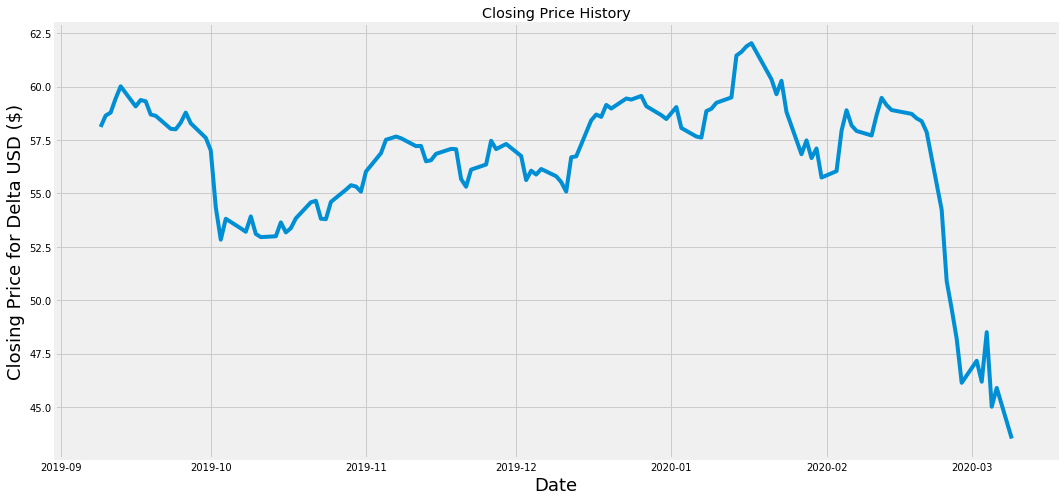

In [16]:
#Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(Delta_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price for Delta USD ($)', fontsize=18)
plt.show()

In [17]:
#Create a new dataframe with only the "Close" column
data = Delta_df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .7)

training_data_len

89

In [18]:
#Scale the data with using an ue of array with numpy
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.78822266],
       [0.81685577],
       [0.82441922],
       [0.86007561],
       [0.89086977],
       [0.84008647],
       [0.85629389],
       [0.85305253],
       [0.81955697],
       [0.81631561],
       [0.78336042],
       [0.78227989],
       [0.79902767],
       [0.82441922],
       [0.79740679],
       [0.76066987],
       [0.7287952 ],
       [0.58508909],
       [0.50297149],
       [0.55591582],
       [0.53160459],
       [0.52296063],
       [0.56185838],
       [0.51755802],
       [0.50945441],
       [0.51161546],
       [0.54673149],
       [0.52133974],
       [0.53214475],
       [0.55699634],
       [0.59751499],
       [0.60129671],
       [0.55591582],
       [0.5548353 ],
       [0.5985953 ],
       [0.62938945],
       [0.64073483],
       [0.63749326],
       [0.62452741],
       [0.6753107 ],
       [0.72177211],
       [0.75580762],
       [0.75958955],
       [0.76391144],
       [0.75958955],
       [0.73960021],
       [0.74014057],
       [0.701

In [19]:
#Creating the training data set
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x train and y train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i, 0])
    if i<=60: 
        print(x_train)
        print(y_train)
        print()

[array([0.78822266, 0.81685577, 0.82441922, 0.86007561, 0.89086977,
       0.84008647, 0.85629389, 0.85305253, 0.81955697, 0.81631561,
       0.78336042, 0.78227989, 0.79902767, 0.82441922, 0.79740679,
       0.76066987, 0.7287952 , 0.58508909, 0.50297149, 0.55591582,
       0.53160459, 0.52296063, 0.56185838, 0.51755802, 0.50945441,
       0.51161546, 0.54673149, 0.52133974, 0.53214475, 0.55699634,
       0.59751499, 0.60129671, 0.55591582, 0.5548353 , 0.5985953 ,
       0.62938945, 0.64073483, 0.63749326, 0.62452741, 0.6753107 ,
       0.72177211, 0.75580762, 0.75958955, 0.76391144, 0.75958955,
       0.73960021, 0.74014057, 0.70124261, 0.70394381, 0.72015123,
       0.73257713, 0.73203676, 0.65640188, 0.63695311, 0.68017295,
       0.6931388 , 0.75310642, 0.73203676, 0.74500282, 0.71474882])]
[0.6537006791645585]



In [20]:
#Convering the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(29, 60, 1)

In [22]:
#Building  the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
#Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=15)

Epoch 1/15
29/29 [==============================] - 3s 89ms/step - loss: 0.1134
Epoch 2/15
29/29 [==============================] - 2s 62ms/step - loss: 0.0062
Epoch 3/15
29/29 [==============================] - 2s 52ms/step - loss: 0.0063
Epoch 4/15
29/29 [==============================] - 1s 48ms/step - loss: 0.0059
Epoch 5/15
29/29 [==============================] - 1s 50ms/step - loss: 0.0110
Epoch 6/15
29/29 [==============================] - 2s 60ms/step - loss: 0.0097
Epoch 7/15
29/29 [==============================] - 2s 53ms/step - loss: 0.0068
Epoch 8/15
29/29 [==============================] - 2s 55ms/step - loss: 0.0048
Epoch 9/15
29/29 [==============================] - 2s 53ms/step - loss: 0.0095
Epoch 10/15
29/29 [==============================] - 2s 58ms/step - loss: 0.0081: 0s - loss: 0.008
Epoch 11/15
29/29 [==============================] - 2s 59ms/step - loss: 0.0053
Epoch 12/15
29/29 [==============================] - 2s 60ms/step - loss: 0.0115
Epoch 13/15
29/29 [

In [25]:
#Create the data set
#Create a new array containing scaled vals from index 1543 to 2020
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [26]:
#Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [27]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

3.094044659588788

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


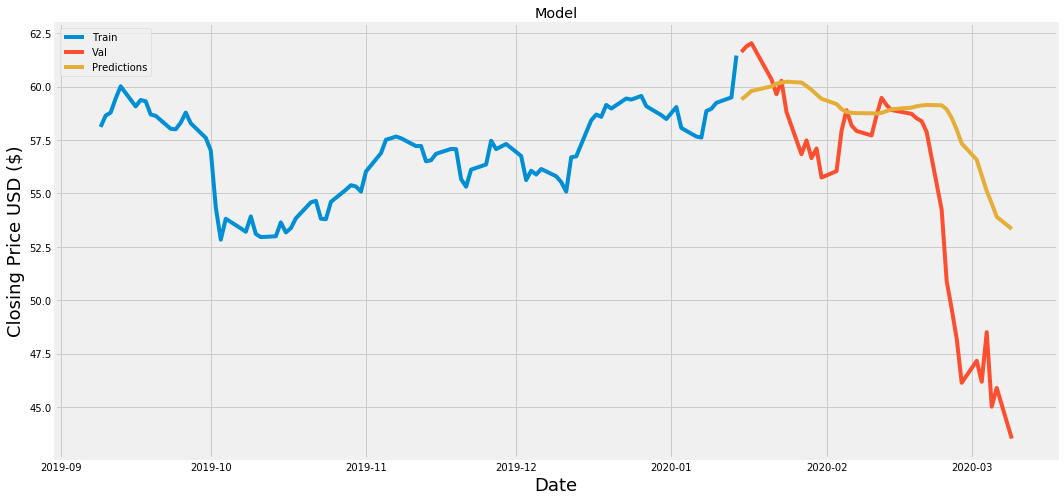

In [29]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [31]:
#showing the prediction we did and actual closing price 
valid

,Close,Predictions
Date,,
2020-01-15,61.619999,59.393944
2020-01-16,61.880001,59.583302
2020-01-17,62.029999,59.793770
2020-01-21,60.340000,60.007889
2020-01-22,59.639999,60.135738
2020-01-23,60.270000,60.188484
2020-01-24,58.810001,60.226948
2020-01-27,56.830002,60.185841
2020-01-28,57.480000,60.025955


#Linear REGRESSION MODEL FOR PREDICTION

In [14]:
#Using Linear Regression for Delta

forecast_time = int(15) # write number of predicitons that you want to make e.g 5,10,15 etc.
#Repalce Delta_df with dataframe of your desired company whose prediciton you want to make e.g Airchina_df, Qantas_df etc.
LR_df=Delta_df[['Open','High','Low','Close','Adj Close','Volume']].copy()  # 
#LR_df=Delta_df.iloc[:,1:].copy()

#Replace High with the column that you want to predict
LR_df['prediction'] = LR_df['Close'].shift(-1)
LR_df.dropna(inplace=True)
X1 = np.array(LR_df.drop(['prediction'], 1))
Y1 = np.array(LR_df['prediction'])
X2 = preprocessing.scale(X1)
X_prediction = X2[-forecast_time:]
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y1, test_size=1)
clf = LinearRegression()
clf.fit(X_train, Y_train)
prediction = (clf.predict(X_prediction))

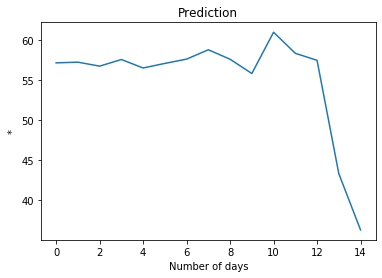

In [15]:
#from data plotting
plt.title("Prediction")
plt.xlabel("Number of days")

#Replace * with the column that you want to predict
plt.ylabel("*");
plt.plot(prediction)
plt.show()

In [16]:
for pred in prediction:
    print(pred)

57.1540349980887
57.240160190536336
56.74640505134568
57.57287603582609
56.51528736396697
57.085693213582026
57.621890003077034
58.79114539779025
57.60744173578795
55.824063143779114
60.97859645729671
58.34903498382696
57.47006643974451
43.32403058204651
36.28930466921944


In [17]:
#Using Linear Regression for Airchina

forecast_time = int(15) # write number of predicitons that you want to make e.g 5,10,15 etc.
#Repalce Delta_df with dataframe of your desired company whose prediciton you want to make e.g Airchina_df, Qantas_df etc.
LR_df=Airchina_df[['Open','High','Low','Close','Adj Close','Volume']].copy()  # 
#LR_df=Delta_df.iloc[:,1:].copy()

#Replace High with the column that you want to predict
LR_df['prediction'] = LR_df['Close'].shift(-1)
LR_df.dropna(inplace=True)
X1 = np.array(LR_df.drop(['prediction'], 1))
Y1 = np.array(LR_df['prediction'])
X2 = preprocessing.scale(X1)
X_prediction = X2[-forecast_time:]
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y1, test_size=1)
clf = LinearRegression()
clf.fit(X_train, Y_train)
prediction = (clf.predict(X_prediction))

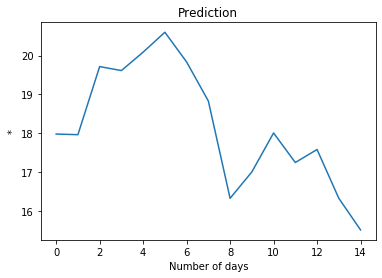

In [18]:
#from data plotting
plt.title("Prediction")
plt.xlabel("Number of days")

#Replace * with the column that you want to predict
plt.ylabel("*");
plt.plot(prediction)
plt.show()

In [19]:
for pred in prediction:
    print(pred)

17.981440652822137
17.964614218904476
19.718413381310935
19.616151846719855
20.090296863143486
20.603030805447105
19.837559952307252
18.831710170265193
16.325697294421218
17.00477719639071
18.008699400532457
17.248106873274637
17.58287575364804
16.327732878036834
15.511932456960201
